Jack & Jill sell t-shirts from a street stall on the upper east side.  Given the data below:
<ol>
<li> write a function run_one() that generates a 30 day profit array for Jack and Jill
<li> generate a 1000 X 30 dataframe that contains the 30 day profit arrays from 1000 simulation runs
<li> generate a 1000 X 30 dataframe that contains cumulative profits for each run
<li> report the following using these two data frames:
<ol>
<li> the mean and the standard deviation of the average daily profit from all runs
<li> the mean and the standard deviation of the cumulative 30 day profit across all runs
<li> the mean and the standard deviation of the lowest profit (greatest loss) from each run
<li> the mean and the standard deviation of the highest profit from each run
<li> the average cumulative profit for each day across runs (i.e., the average of the two day cumulative profit, average of the three day cumulative profit, etc.
<li> a line graph of the average cumulative profits for each day with day on the x-axis and average profit on the y-axis
</ol>
</ol>

In [66]:
unit_cost = 2 #What Jack and Jill pay a Shenzen based company for each t-shirt
unit_price = 5 #The selling price of each t-shirt
unit_storage_cost = 0.10  #The daily cost of storing one t-shirt overnight in inventory
shipping_days_mean = 5 #The average number of days it takes a shipment to arrive from Shenzen
shipping_days_std =2.2 #The standard deviation of shipping days. Assume normal distribution
sales_mean = 1000 #The average number of shirts sold on a given day
sales_std = 523 #The standard deviation of daily sales. Assume normal distribution
inventory = 5001 #The starting inventory
reorder_level = 5000 #The level at or below which Jack and Jill will place an order. 
order_qty = 5000 #The amount of an order. Note that when ordering, they will look at the inventory level plus 
order_not_deliverd=0 #the amount ordered but not yet delivered

In [1]:
import matplotlib as mlt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## function run_one() that generates a 30 day profit array for Jack and Jill

In [2]:
def run_one():
    unit_cost = 2 #What Jack and Jill pay a Shenzen based company for each t-shirt
    unit_price = 5 #The selling price of each t-shirt
    unit_storage_cost = 0.10  #The daily cost of storing one t-shirt overnight in inventory
    shipping_days_mean = 5 #The average number of days it takes a shipment to arrive from Shenzen
    shipping_days_std =2.2 #The standard deviation of shipping days. Assume normal distribution
    sales_mean = 1000 #The average number of shirts sold on a given day
    sales_std = 523 #The standard deviation of daily sales. Assume normal distribution
    inventory = 5001 #The starting inventory
    reorder_level = 5000 #The level at or below which Jack and Jill will place an order. 
    order_qty = 5000 #The amount of an order. Note that when ordering, they will look at the inventory level plus 
    order_not_deliverd=0 #the amount ordered but not yet delivered
    profits_30=[] # profits in 30 days
    reorderd_data=0 # record reorderd date
    x=0
    shipping_days=0

    for t in range(30):
        
        sales=int(np.random.normal(sales_mean, sales_std, 1)[0])
        if sales<0:
            sales=0
        actual_sales=min(inventory,sales)
        inventory=inventory-actual_sales
        dilivery_fee=0
        
        if (inventory + order_not_deliverd) < reorder_level:
            x=int(np.random.normal(shipping_days_mean, shipping_days_std, 1)[0])       
            order_not_deliverd=order_qty
            reorderd_data=t
            #print(inventory,inventory + order_not_deliverd)
            shipping_days=x
        
        if t == (reorderd_data+shipping_days):
            inventory+=order_not_deliverd
            order_not_deliverd=0
            dilivery_fee=5000*unit_cost

        profits=(unit_price*actual_sales)-((inventory-actual_sales)*unit_storage_cost)-dilivery_fee
        profits_30.append(profits)
    return np.asarray(profits_30)

## generate a 1000 X 30 dataframe that contains the 30 day profit arrays from 1000 simulation runs
## generate a 1000 X 30 dataframe that contains cumulative profits for each run

In [3]:
df_profits=pd.DataFrame({})
df_cumulative_profits=pd.DataFrame({})
for i in range(1000):
    return_perday=run_one()
    df_profits["Run_"+str(i)]=return_perday
    for j in range(1,len(return_perday)):
        return_perday[j]=return_perday[j]+return_perday[j-1]
        df_cumulative_profits["Run_"+str(i)]=return_perday
profit_30_days=df_profits.transpose().copy()
cumulative_profits=df_cumulative_profits.transpose().copy()

## A. the mean and the standard deviation of the average daily profit from all runs

In [4]:
average_daily_profit=np.zeros(1000)
for i in range(1000):
    average_daily_profit[i]=np.mean(df_profits["Run_"+str(i)])
print("the mean of the average daily profit from all runs:",np.mean(average_daily_profit))
print("the standard deviation of the average daily profit from all runs:",np.std(average_daily_profit))

('the mean of the average daily profit from all runs:', 2336.0249433333333)
('the standard deviation of the average daily profit from all runs:', 349.44437618758457)


## B. the mean and the standard deviation of the cumulative 30 day profit across all runs

In [5]:
cumulative_30_day_profit=np.zeros(1000)
for i in range(1000):
    cumulative_30_day_profit[i]=df_cumulative_profits["Run_"+str(i)][29]
print("the mean of the cumulative 30 day profit from all runs:",np.mean(cumulative_30_day_profit))
print("the standard deviation of the cumulative 30 day profit from all runs:",np.std(cumulative_30_day_profit))

('the mean of the cumulative 30 day profit from all runs:', 70080.748300000007)
('the standard deviation of the cumulative 30 day profit from all runs:', 10483.331285627537)


## C.the mean and the standard deviation of the lowest profit (greatest loss) from each run

In [6]:
lowest_profit=np.zeros(1000)
for i in range(1000):
    lowest_profit[i]=min(df_profits["Run_"+str(i)])
print("the mean of the lowest profit from all runs:",np.mean(lowest_profit))
print("the standard deviation of the lowest profit from all runs:",np.std(lowest_profit))

('the mean of the lowest profit from all runs:', -10336.507399999999)
('the standard deviation of the lowest profit from all runs:', 1012.0045300319758)


## D.the mean and the standard deviation of the highest profit from each run

In [7]:
highest_profit=np.zeros(1000)
for i in range(1000):
    highest_profit[i]=max(df_profits["Run_"+str(i)])
print("the mean of the highest profit from all runs:",np.mean(highest_profit))
print("the standard deviation of the highest profit from all runs:",np.std(highest_profit))

('the mean of the highest profit from all runs:', 9820.755799999999)
('the standard deviation of the highest profit from all runs:', 1379.9192558720094)


## E. the average cumulative profit for each day across runs 
(i.e., the average of the two day cumulative profit, average of the three day cumulative profit, etc.

In [8]:
average_cumulative_profit_per=[]
date=[]
for k in range(30):
    average_cumulative_profit_per.append(np.mean(df_cumulative_profits.iloc[k]))
average_cumulative_profit=pd.DataFrame({})
average_cumulative_profit["average_cumulative_profit"]=average_cumulative_profit_per
for i in range(1,31):
    date.append(str(i)+"Days")
average_cumulative_profit.index=date
average_cumulative_profit

,average_cumulative_profit
1Days,4047.6644
2Days,8463.6939
3Days,12469.6501
4Days,15268.9569
5Days,17055.6915
6Days,18104.9636
7Days,19722.9948
8Days,21924.0426
9Days,24623.2447
10Days,26889.9625


## F. a line graph of the average cumulative profits for each day with day on the x-axis and average profit on the y-axis

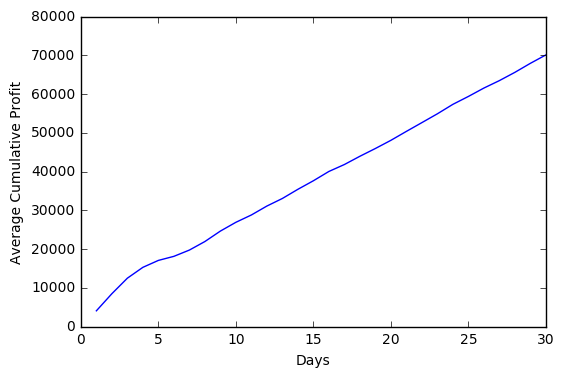

In [10]:
x=range(1,31)
y=average_cumulative_profit["average_cumulative_profit"]
plt.plot(x,y,"-b")
plt.ylabel("Average Cumulative Profit")
plt.xlabel("Days")